
1. Detect edges in the cameraman.tif image using the Sobel operator [3x3].
2. Detect edges in the cameraman.tif image using the Sobel operator [5x5].
3. Apply histogram equalization to the cameraman.tif image to determine the inflection points of the equalization function.
4. Detect edges in the resulting image using the Sobel operator [3x3].



In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy.signal import convolve

In [ ]:
def plot2(arr1, arr2, title1, title2):
  plt.figure(figsize=(10,5))

  plt.subplot(1,2,1)
  plt.imshow(arr1, cmap='gray')
  plt.title(title1)
  plt.axis("off")

  plt.subplot(1,2,2)
  plt.imshow(arr2, cmap='gray')
  plt.title(title2)
  plt.axis("off")

  plt.show()

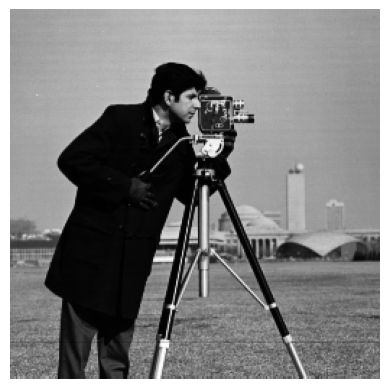

In [ ]:
image_path = '/content/drive/MyDrive/cameraman.tif'


image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image_array = np.array(image)


def plot(img):
  plt.imshow(img, cmap="gray")
  plt.axis("off")
  plt.show()


plot(image)


***The Sobel operator*** is a classical image processing tool used for edge detection. The Sobel [3x3] operator employs two 3x3 kernels to approximate the gradient in horizontal and vertical directions. By applying these kernels to each pixel of the image, it calculates the gradient magnitude and highlights edges. Similarly, the Sobel [5x5] operator uses 5x5 kernels to compute the gradient, providing greater accuracy and detail in edge detection compared to the [3x3] version.

In [ ]:
def sobel3(array):
  G_x = np.array([[-1,-2,-1],
                  [0,0,0],
                  [1,2,1]])
  G_y = np.array([[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]])
  gr_x = np.abs(convolve(array, G_x, mode='same'))
  gr_y = np.abs(convolve(array, G_y, mode='same'))

  res = np.sqrt(gr_x**2 + gr_y**2)
  return res


def sobel5(array):
  G_x = np.array([[1/4, 1/2, 1, 1/2, 1/4],
                  [1/2, 1, 2, 1, 1/2],
                  [0, 0, 0, 0, 0],
                  [-1/2, -1, -2, -1, -1/2],
                  [-1/4, -1/2, -1, -1/2, -1/4]])
  G_y = np.array([[-1/4, -1/2, 0, 1/2, 1/4],
                  [-1/2, -1, 0, 1, 1/2],
                  [-1, -2, 0, 2, 1],
                  [-1/2, -1, 0, 1, 1/2],
                  [-1/4, -1/2, 0, 1/2, 1/4]])
  gr_x = np.abs(convolve(array, G_x, mode='same'))
  gr_y = np.abs(convolve(array, G_y, mode='same'))

  res = np.sqrt(gr_x**2 + gr_y**2)
  return res

def linear_contrast(arr):
  x_min = np.min(arr)
  x_max = np.max(arr)
  contrast = 255 / (x_max - x_min) * (arr-x_min)
  contrast = np.round(contrast).astype(int)
  contrast[arr < 0] = 0
  contrast[arr > 255] = 255
  return contrast

In [ ]:
def sobel(img, Gx, Gy, n):
  [rows, columns] = np.shape(img)
  sobel_filtered_image = np.zeros(shape=(rows, columns))
  for i in range(rows - n + 1):
      for j in range(columns - n +1):
          gx = np.sum(np.multiply(Gx, img[i:i + n, j:j + n]))
          gy = np.sum(np.multiply(Gy, img[i:i + n, j:j + n]))
          sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)
  return sobel_filtered_image

G_3x = np.array([[-1,-2,-1],
                  [0,0,0],
                  [1,2,1]])
G_3y = np.array([[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]])

G_5x = np.array([[1/4, 1/2, 1, 1/2, 1/4],
                  [1/2, 1, 2, 1, 1/2],
                  [0, 0, 0, 0, 0],
                  [-1/2, -1, -2, -1, -1/2],
                  [-1/4, -1/2, -1, -1/2, -1/4]])
G_5y = np.array([[-1/4, -1/2, 0, 1/2, 1/4],
                  [-1/2, -1, 0, 1, 1/2],
                  [-1, -2, 0, 2, 1],
                  [-1/2, -1, 0, 1, 1/2],
                  [-1/4, -1/2, 0, 1/2, 1/4]])

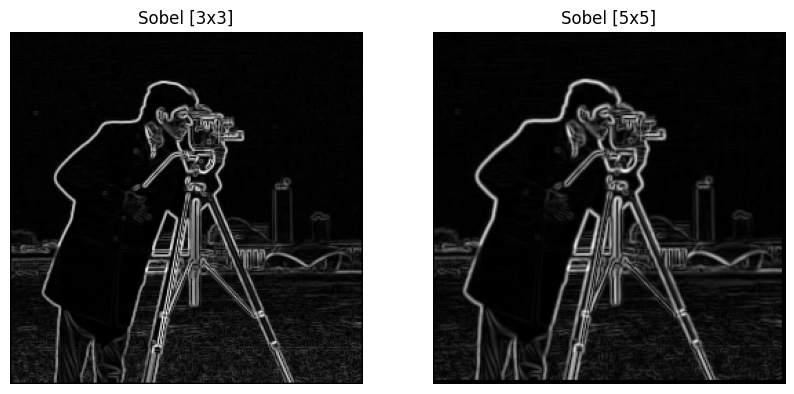

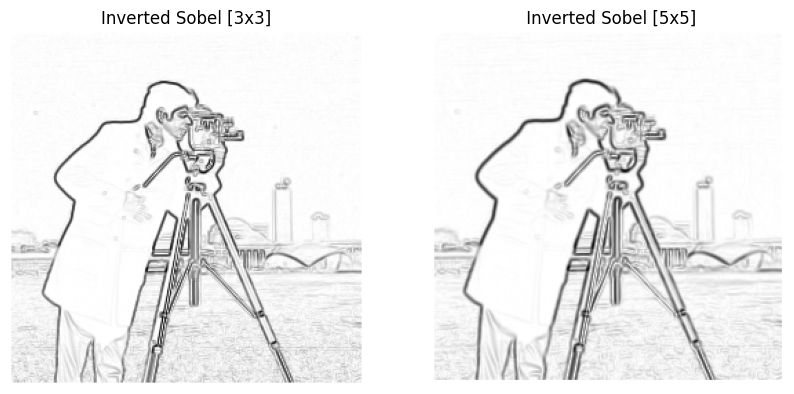

In [ ]:
sobel_3 = sobel(image_array, G_3x, G_3y, 3)
sobel_5 = sobel(image_array, G_5x, G_5y, 5)

plot2(sobel_3, sobel_5, 'Sobel [3x3]', 'Sobel [5x5]')
plot2(255-sobel_3, 255-sobel_5, 'Inverted Sobel [3x3]', ' Inverted Sobel [5x5]')

***Enhancement*** is an image processing operation used to increase contrast and highlight details in an image. In this case, the inflection points of the enhancement function are determined by analyzing the image's histogram.

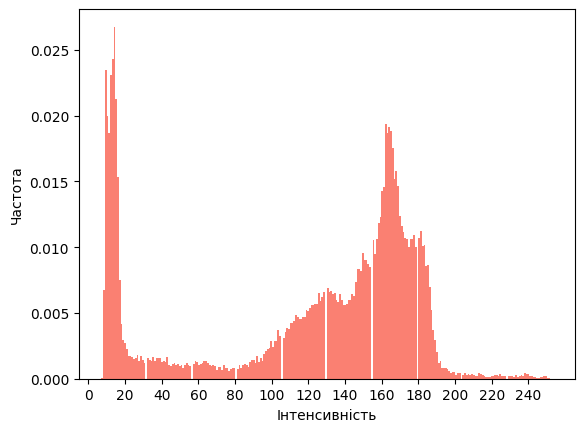

In [ ]:
def histograma(arr):
  plt.hist(arr.flatten(), bins=256, density=True, color='salmon')
  plt.xlabel('Інтенсивність')
  plt.ylabel('Частота')
  plt.xticks(np.arange(0,256,20))
  plt.show()

histograma(image_array)

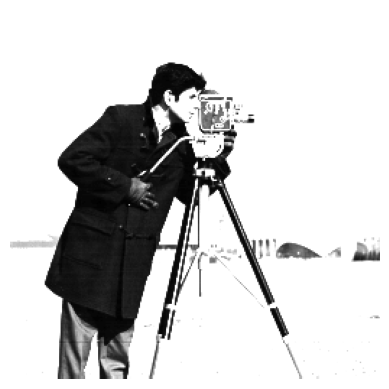

In [ ]:
def prep_function(image, x1, x2):
  if x2>x1:
    prep_image = image.copy()
    prep_image[prep_image < x1] = x1
    prep_image[prep_image > x2] = x2
    return prep_image
prep_image = prep_function(image_array, 0 , 80)

plot(prep_image)

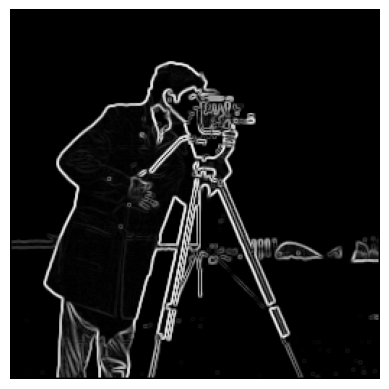

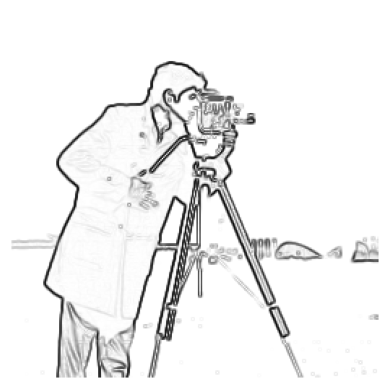

In [ ]:
sobel_3 = sobel(prep_image, G_3x, G_3y, 3)
plot(sobel_3)
plot(255-sobel_3)
